In [ ]:
import time 
from multiprocessing import Pool
import numpy as np 


In [2]:
from multiprocessing import cpu_count
# get the number of cpu cores
num_cores = cpu_count()
# report details
print(num_cores)

8


# Comparison 1: Pool.map

In [ ]:


def function1(x): 
    return eval('x**100')


In [85]:
seed = np.random.seed(1)
data1= list(np.random.uniform(-100, 100, 100))
print(data1[:10])


result1List = []
result1List_Array = []

[-16.595599059485195, 44.06489868843161, -99.97712503653102, -39.53348547363205, -70.64882183657738, -81.53228104624044, -62.74795772446582, -30.88785459139045, -20.646505153866016, 7.7633468006713855]


In [86]:

with Pool() as pool:
    start = time.time()
    for result in pool.map(function1,data1):
        result1List_Array.append(result)
    end = time.time()
print(end - start )

0.00545954704284668


In [87]:
start = time.time()
for result in map(function1,data1 ):
    result1List.append(result)
end = time.time()
print(end - start )

0.0016622543334960938


## Comparison: if np.ndarray still works 

In [ ]:
seed = np.random.seed(1)
data1= list(np.random.uniform(-100, 100, 100))
print(data1[:10])


result1List = []
result1List_Array = []

In [81]:

with Pool() as pool:
    start = time.time()
    for result in pool.map(function1,np.array(data1)):
        result1List_Array.append(result)
    end = time.time()
print(end - start )


0.005410909652709961


In [82]:
start = time.time()
for result in map(function1,data1 ):
    result1List.append(result)
end = time.time()
print(end - start )

0.0049800872802734375


In [84]:
np.all(np.array(result1List) == np.array(result1List_Array))

True

# Comparison 2: startmap 

In [5]:
def function2(x, y, z): 
    return eval('x**10*y + z**(1/4) - 2*x**y*z')

def function2Modified(x): 
    return eval('x[0]**10*x[1] + x[2]**(1/4) - 2*x[0]**x[1]*x[2]')



In [6]:
seed = np.random.seed(1)
data2 = np.random.uniform(1, 10, (10, 3))

result2List = []
result2List2 = []

data2[:10]



array([[4.75319804, 7.48292044, 1.00102937],
       [3.72099315, 2.32080302, 1.83104735],
       [2.6763419 , 4.11004654, 4.57090727],
       [5.84935061, 4.77275063, 7.1669755 ],
       [2.84007025, 8.90305693, 1.24648834],
       [7.03420759, 4.75574322, 6.02820846],
       [2.26348245, 2.7829134 , 8.20670112],
       [9.71435418, 3.8208176 , 7.23090354],
       [8.88750237, 9.05145997, 1.7653979 ],
       [1.35149305, 2.52847378, 8.90328253]])

In [7]:

with Pool() as pool:
    start = time.time()
    for result in pool.starmap(function2,data2):
        result2List.append(result)
    end = time.time()
print(end - start )


0.0027570724487304688


In [8]:
start = time.time()
for result in map(function2Modified, data2 ):
    result2List2.append(result)
end = time.time()
print(end - start )

0.0009801387786865234


In [126]:
np.all(np.array(result2List) == np.array(result2List2))

True

# Comparison 3: more complex for loops 

In [2]:
def trial_division(n: int) -> list[int]:
    """Return a list of the prime factors for a natural number."""
    a = []               # Prepare an empty list.
    f = 2                # The first possible factor.    
    while n > 1:         # While n still has remaining factors...
        if n % f == 0:   # The remainder of n divided by f might be zero.        
            a.append(f)  # If so, it divides n. Add f to the list.
            n //= f      # Divide that factor out of n.
        else:            # But if f is not a factor of n,
            f += 1       # Add one to f and try again.
    return a             # Prime factors may be repeated: 12 factors to 2,2,3.

In [11]:
start = time.time()

print(trial_division(104934324343))

end = time.time()
print(end - start)

[163, 643768861]
47.426209688186646


In [ ]:
2*4627633*113377967

In [37]:
import numpy as np 
seed = np.random.seed(1)
data = np.random.randint(104934333, high =10493432433,  size = 5)

resultList = []

In [40]:
# using map 
start = time.time()
for result in map(trial_division, data ): 
    resultList.append(result)
end  = time.time()
print(end - start)
    

30.35191059112549


In [41]:
# using pool.map 

with Pool() as pool:
    start = time.time()
    for result in pool.map(trial_division,data):
        resultList.append(result)
    end = time.time()
print(end - start )

28.167335748672485


1. trial: 31.980625867843628, 28.43137836456299
2. trial: 30.35191059112549, 28.167335748672485

# Pool.map, repeated loop using indices 

In [26]:
lista = []
k = 2 



In [27]:
def function(i):
    
    lista.append(np.random.random())
    
    
    print(f'{i}. loop and k is {k} ')

In [28]:
idxList = list(range(10))

with Pool() as pool: 
    pool.map(function, idxList)

3. loop and k is 2 1. loop and k is 2 0. loop and k is 2 2. loop and k is 2 4. loop and k is 2 



7. loop and k is 2 
9. loop and k is 2 
8. loop and k is 2 

6. loop and k is 2 
5. loop and k is 2 


## Pool.map, returning independent random values 

In [35]:
lista = []
k = 2 



In [36]:
def function(i):
    print(f'{i}. loop and k is {k} ')
    
    return np.random.random()
    
    
    

In [37]:
idxList = list(range(10))

with Pool() as pool: 
    
    for result in pool.map(function, idxList): 
        lista.append(result)

3. loop and k is 2 4. loop and k is 2 1. loop and k is 2 2. loop and k is 2 6. loop and k is 2 5. loop and k is 2 



0. loop and k is 2 
7. loop and k is 2 8. loop and k is 2 9. loop and k is 2 






In [38]:
lista 

[0.0983468338330501,
 0.0983468338330501,
 0.0983468338330501,
 0.0983468338330501,
 0.0983468338330501,
 0.0983468338330501,
 0.0983468338330501,
 0.0983468338330501,
 0.42110762500505217,
 0.42110762500505217]

Seems samples are not truly independent of each other 

### Working solution

In [26]:
lista = []
k = 2 



In [27]:
def function(i):
    print(f'{i}. loop and k is {k} ')
    local_state = np.random.RandomState()
    return local_state.random_sample(1)[0]
    
    
    

In [59]:
idxList = list(range(10000))

with Pool() as pool: 
    
    for result in pool.map(function, idxList): 
        lista.append(result)

939. loop and k is 2 313. loop and k is 2 0. loop and k is 2 1565. loop and k is 2 1252. loop and k is 2 1878. loop and k is 2 626. loop and k is 2 


2191. loop and k is 2 
314. loop and k is 2 
940. loop and k is 2 


315. loop and k is 2 


1879. loop and k is 2 2192. loop and k is 2 941. loop and k is 2 1566. loop and k is 2 1253. loop and k is 2 
627. loop and k is 2 


2193. loop and k is 2 316. loop and k is 2 1254. loop and k is 2 

1880. loop and k is 2 942. loop and k is 2 2194. loop and k is 2 

1255. loop and k is 2 
1881. loop and k is 2 317. loop and k is 2 




628. loop and k is 2 1256. loop and k is 2 318. loop and k is 2 1. loop and k is 2 943. loop and k is 2 


1567. loop and k is 2 944. loop and k is 2 
629. loop and k is 2 1257. loop and k is 2 2. loop and k is 2 
1882. loop and k is 2 



945. loop and k is 2 

2195. loop and k is 2 

319. loop and k is 2 1883. loop and k is 2 
1258. loop and k is 2 

1568. loop and k is 2 1884. loop and k is 2 630. loop and k is

In [60]:

lista 

[0.4243650049092035,
 0.08415764873702858,
 0.6791486185606764,
 0.9883560954063526,
 0.8095860786970549,
 0.9521232316254014,
 0.49756924215968024,
 0.5358274835369478,
 0.42383459230707354,
 0.8770348627835689,
 0.27941623613037025,
 0.3248866487934663,
 0.6852593120916097,
 0.758333841580708,
 0.35291428793631463,
 0.7484963034025581,
 0.6756637375842496,
 0.3073175398642921,
 0.26955642506294664,
 0.8646060309498859,
 0.6412336526051745,
 0.15619146140816298,
 0.8502814870252529,
 0.5274176802262808,
 0.853418652369011,
 0.8886794356104127,
 0.8201579579294905,
 0.0548080310403708,
 0.19083079262746427,
 0.9074714194177158,
 0.24454279449817107,
 0.14640807492370977,
 0.6284355589968794,
 0.1637829849101532,
 0.9584714867227629,
 0.5318294208299098,
 0.26012416870441823,
 0.5102209919888099,
 0.9784767881562458,
 0.503492347999751,
 0.27322725009258275,
 0.8582913035300977,
 0.22898597698646073,
 0.31414803933903723,
 0.2144148507233925,
 0.3753769112646782,
 0.4228689354318591,
 0

In [61]:
import matplotlib.pyplot as plt 

(array([ 982.,  960., 1013., 1017.,  980.,  997., 1024., 1012., 1014.,
        1001.]),
 array([1.13796867e-04, 1.00089212e-01, 2.00064627e-01, 3.00040042e-01,
        4.00015456e-01, 4.99990871e-01, 5.99966286e-01, 6.99941701e-01,
        7.99917116e-01, 8.99892531e-01, 9.99867946e-01]),
 <BarContainer object of 10 artists>)

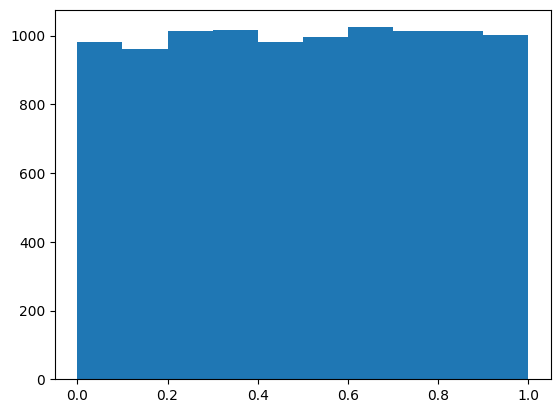

In [62]:
plt.hist(lista)

### Working solution 2: simpler version 

In [31]:
lista = []
k = 2 



In [32]:
def function(i):
    print(f'{i}. loop and k is  ')
    np.random.seed(i)
    return np.random.random()
    
    
    

In [33]:
idxList = list(range(10))

with Pool() as pool: 
    
    for result in pool.map(function, idxList): 
        lista.append(result)
lista 

0. loop and k is  1. loop and k is  2. loop and k is  

7. loop and k is  6. loop and k is  
4. loop and k is  5. loop and k is  3. loop and k is  

8. loop and k is  9. loop and k is  






[0.5488135039273248,
 0.417022004702574,
 0.43599490214200376,
 0.5507979025745755,
 0.9670298390136767,
 0.22199317108973948,
 0.8928601514360016,
 0.07630828937395717,
 0.8734294027918162,
 0.010374153885699955]

In [37]:
np.random.seed(1)

def randomFunction(k): 
    return np.random.random()

In [44]:
np.random.seed(1)
randomFunction(1)

0.417022004702574

In [49]:
local_state = np.random.RandomState()
local_state.uniform(-100, 100, size = (3,2,3))

array([[[-85.36889801,  37.1194713 , -73.55487415],
        [ -1.1525372 ,  92.76762566, -91.93374754]],

       [[ 55.01846542,  94.82749533,  35.60150263],
        [ 77.58124626,  40.63382228, -21.1593977 ]],

       [[ -7.25248473, -74.20582266,   2.91499538],
        [  5.1714624 ,  -1.76420087,  31.94135051]]])